# Arabic Learner Corpus Considerations: Classifier Training and Data Analysis
Anthony Verardi | a.verardi@pitt.edu | 3/17/2020 | University of Pittsburgh

In this Notebook (which is a continuation of [ALC Data Organization](https://github.com/Data-Science-for-Linguists-2020/Arabic-Learner-Corpus-Considerations/blob/master/Notebooks/ALC_Data_Organization.ipynb)), I'll begin the process of analyzing the data obtained from the [Arabic Learner Corpus](https://www.arabiclearnercorpus.com/).

Corpus credit to: Alfaifi, A., Atwell, E. and Hedaya, I. (2014). Arabic Learner Corpus (ALC) v2: A New Written and Spoken Corpus of Arabic Learners. In the proceedings of the Learner Corpus Studies in Asia and the World (LCSAW) 2014, 31 May - 01 Jun 2014. Kobe, Japan. http://www.arabiclearnercorpus.com.

**Table of Contents**
1. [Visualizations of Subgroups](#subgroups)
1. [SVC Classification of L1](#classifier)

In [8]:
# Importing necessary packages to begin analyzing our data

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC

# Allowing for multiple lines of output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

First and foremost, let's read in our `DataFrame` from the Organization Notebook and make certain that everything's still there.

In [2]:
df = pd.read_pickle("ALC_df.pkl")

In [3]:
df.head()

,L1,NumLangs,Nationality,Age,Gender,YearsStudy,GenLvl,LvlStdy,Title,Text,Genre,Mode,TextToks,TitleToks,TextLen,TitleLen,TTR,L1family
DocID,,,,,,,,,,,,,,,,,,
S001_T1_M_Pre_NNAS_W_C,Moore,4,Burkina Faso,20,Male,14,Pre-university,Diploma course,الرحلة إلى القرية لزيارة ذوي القربى,اعتدت الذهاب إلى قريتي في الإجازات الصيفيّة ال...,Narrative,Written,"[اعتدت, الذهاب, إلى, قريتي, في, الإجازات, الصي...","[الرحلة, إلى, القرية, لزيارة, ذوي, القربى]",169,6,0.798817,NigerCongo
S001_T2_M_Pre_NNAS_W_C,Moore,4,Burkina Faso,20,Male,14,Pre-university,Diploma course,الجمع بين العلم الشرعي والعلوم الدنيوية لحمزة ...,أحبّ أن ألتحق بكلِّية الشريعة بعد الانتها من ا...,Discussion,Written,"[أحبّ, أن, ألتحق, بكلِّية, الشريعة, بعد, الانت...","[الجمع, بين, العلم, الشرعي, والعلوم, الدنيوية,...",161,9,0.844720,NigerCongo
S002_T1_M_Pre_NNAS_W_C,Russian,5,Russian,25,Male,5,Pre-university,Diploma course,رحلة الحج المباركة,كتب الله لي أن أحج إلى بيته الحرام السنة الماض...,Narrative,Written,"[كتب, الله, لي, أن, أحج, إلى, بيته, الحرام, ال...","[رحلة, الحج, المباركة]",317,3,0.637224,BaltoSlavic
S002_T2_M_Pre_NNAS_W_C,Russian,5,Russian,25,Male,5,Pre-university,Diploma course,أكثر من التخصص,الحمد لله الذي وفقني لدراسة شرعية في جامعة الإ...,Discussion,Written,"[الحمد, لله, الذي, وفقني, لدراسة, شرعية, في, ج...","[أكثر, من, التخصص]",173,3,0.757225,BaltoSlavic
S003_T1_M_Pre_NNAS_W_C,Tatar,4,Russian,24,Male,6,Pre-university,Diploma course,رحلتي إلى الجبال,في أحد الأيام الصيف أخبرنا أبي بسفرٍ إلى الغاب...,Narrative,Written,"[في, أحد, الأيام, الصيف, أخبرنا, أبي, بسفرٍ, إ...","[رحلتي, إلى, الجبال]",133,3,0.766917,Turkic


## WIP: Visualizations of Subgroups <a name="subgroups"></a>
**Need some more time to play with/refine these, I wanted to focus on the classifier first!**

We already know from our organization notebook that the L1 data are not normally distributed, but what about the lengths of the texts themselves? We'll visualize both the raw counts and the TTR values for each. First we'll just look at the raw values, then we'll break them out across L1 partitions.

(0, 1000)

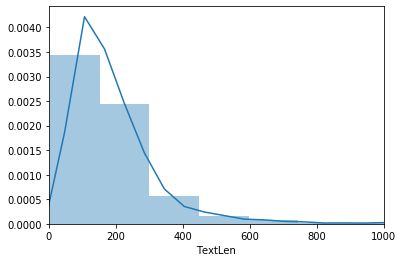

In [4]:
fig, ax = plt.subplots()
sns.distplot(df['TextLen'], ax=ax)
ax.set_xlim(0,1000)
plt.show()

Not the prettiest plot in the world, but it gets the job done. Text length itself is most certainly skewed to the right, with a majority of values clustered in the 0-200 range. The density plot 

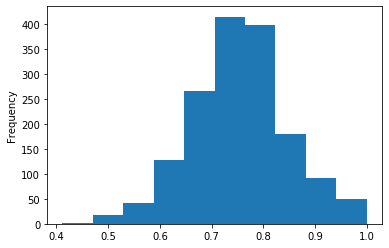

In [5]:
df['TTR'].plot.hist()

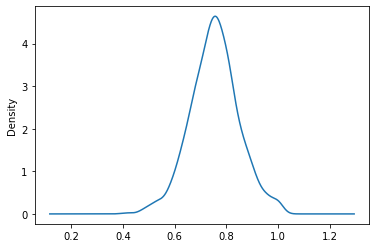

In [6]:
df['TTR'].plot(kind="density")

## SVC Classification of L1 <a name="classifier"></a>
In this section, we'll investigate whether this dataset, with some tweaking, is usable for training a classifier to predict the L1 family of the writer based on their text sample. Because there are so many different L1s represented in the dataset with so few participants per L1 in most cases, collapsing them into larger families seemed logical. First, we'll start off by using `GridsearchCV` to tweak the parameters fo our model and find what works best.

In [9]:
svc = sklearn.svm.SVC(kernel='rbf', C=1E5, gamma="auto")
tfIdf = TfidfVectorizer()

pipe = Pipeline(steps=[('tfIdf', tfIdf),('svc',svc)])

clf = GridSearchCV(pipe, param_grid = {"tfIdf__max_features":[2000, 5000], 
                                      "tfIdf__min_df":[1,2,3],
                                       "tfIdf__max_df":[.5,.75]}, cv=5, return_train_score=True)

clf.fit(df.Text, df.L1family)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tfIdf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [10]:
clf.best_params_

{'tfIdf__max_df': 0.75, 'tfIdf__max_features': 5000, 'tfIdf__min_df': 2}

In [11]:
df2 = pd.DataFrame.from_dict(clf.cv_results_)
df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tfIdf__max_df,param_tfIdf__max_features,param_tfIdf__min_df,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.666517,0.158380,0.336967,0.031486,0.5,2000,1,"{'tfIdf__max_df': 0.5, 'tfIdf__max_features': ...",0.623457,0.621875,...,0.632808,0.011957,12,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,2.641460,0.159568,0.316701,0.022883,0.5,2000,2,"{'tfIdf__max_df': 0.5, 'tfIdf__max_features': ...",0.626543,0.621875,...,0.634069,0.011392,11,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,2.623243,0.064901,0.506667,0.406354,0.5,2000,3,"{'tfIdf__max_df': 0.5, 'tfIdf__max_features': ...",0.623457,0.625000,...,0.635331,0.013857,9,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,3.848887,0.101992,0.369962,0.013280,0.5,5000,1,"{'tfIdf__max_df': 0.5, 'tfIdf__max_features': ...",0.629630,0.621875,...,0.644164,0.017722,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,3.899492,0.125194,0.370708,0.014967,0.5,5000,2,"{'tfIdf__max_df': 0.5, 'tfIdf__max_features': ...",0.638889,0.612500,...,0.643533,0.019537,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,3.857989,0.123629,0.394317,0.032608,0.5,5000,3,"{'tfIdf__max_df': 0.5, 'tfIdf__max_features': ...",0.623457,0.628125,...,0.641640,0.017984,6,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,2.694232,0.176556,0.317198,0.018352,0.75,2000,1,"{'tfIdf__max_df': 0.75, 'tfIdf__max_features':...",0.626543,0.625000,...,0.637855,0.013134,7,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,2.642260,0.051245,0.325909,0.027769,0.75,2000,2,"{'tfIdf__max_df': 0.75, 'tfIdf__max_features':...",0.629630,0.618750,...,0.634700,0.014814,10,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,2.648706,0.059738,0.321024,0.011700,0.75,2000,3,"{'tfIdf__max_df': 0.75, 'tfIdf__max_features':...",0.629630,0.618750,...,0.635962,0.015175,8,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,4.074784,0.278088,0.393593,0.025195,0.75,5000,1,"{'tfIdf__max_df': 0.75, 'tfIdf__max_features':...",0.632716,0.612500,...,0.642271,0.017844,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0


Now that we have our best parameters, we'll train one model that makes use of them so that we can then use a confusion matrix to look at the actual performance by L1 family.

In [12]:
text_train, text_test, y_train, y_test = train_test_split(df['Text'], df['L1family'], test_size = .2, random_state=0)

SVC_model = make_pipeline(TfidfVectorizer(max_features = 5000, min_df=2, max_df=.75), 
                          SVC(kernel='linear', C=1E5, gamma='auto'))

SVC_model.fit(text_train, y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.75, max_features=5000,
                                 min_df=2, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degre

In [13]:
# Predictions
predictions = SVC_model.predict(text_test)

# Matrix
matrix = confusion_matrix(y_test, predictions)

# Accuracy assessment
accuracy = accuracy_score(y_test, predictions)
accuracy

0.6561514195583596

<Figure size 864x864 with 0 Axes>

(18.0, 0.0)

Text(0.5, 152.97257142857137, 'True L1 Family')

Text(87.0, 0.5, 'Predicted L1 Family')

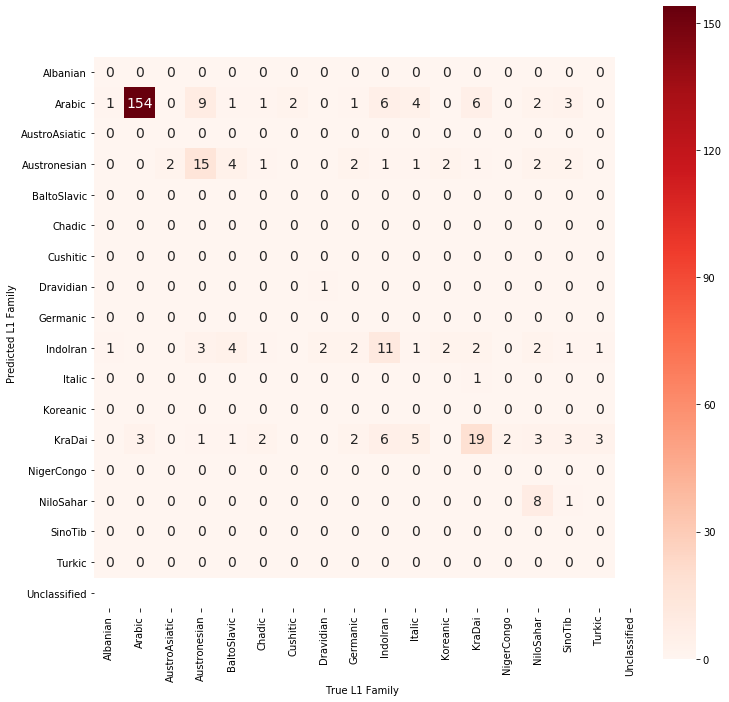

In [14]:
plt.figure(figsize=(12,12))

ax = sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 14},
            xticklabels= np.unique(df['L1family']), yticklabels= np.unique(df['L1family']))

bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5) 

plt.xlabel('True L1 Family')
plt.ylabel('Predicted L1 Family')
plt.show()

So, this leaves us with the preliminary question: how is this classifier doing? When considering that the Arabic L1 data make up 790 out of the 1,585 observations (~49.84%), an accuracy of around 65% seems not that great. We've got an almost 50% chance at getting the right label just by labeling everything as Arabic and calling it a day. Even after collpapsing the data into families, it doesn't seem like it's been able to overcome the sheer imbalance of data that's presented here for training a classifier. It does seem to be performing better on the Austronesian, Indo-Iranian, and the Kra-Dai families; here, feature union might be useful, although I still have not been able to crack how to implement it successfully. More to come, but for preliminary results, I think things are shaping up.

Finally, we'll try to look at the most informative features that our model gives us. 

In [15]:
# Thank you, stack overflow
# https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers

# modified to handle n-grams and flexible top number
def print_top(vectorizer, clf, class_labels, n):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top = np.argsort(clf.coef_[i])[0-n:]
        print("%s: %s" % (class_label,
              ", ".join(feature_names[j].replace(' ', '-') for j in top)))
             # ^ comma-separate                      ^^^ hyphenate multi-word features (=n-grams) if any 

# Vectorizer and classifier are steps in the pipeline. Must retrieve. 
vzr = SVC_model.steps[0][1] 
clf = SVC_model.steps[1][1] 

print_top(vzr, clf, clf.classes_, 20)

Albanian: 10
Arabic: 10
AustroAsiatic: 10
Austronesian: 10
BaltoSlavic: 10
Chadic: 10
Cushitic: 10
Dravidian: 10
Germanic: 10
IndoIran: 10
Italic: 10
Koreanic: 10
KraDai: 10
NigerCongo: 10
NiloSahar: 10
SinoTib: 10
Turkic: 10
Unclassified: 10


Unfortunately, it looks like this isn't working out quite right with my model; I'm not sure SVC is compatible with this. The original code used a Multinominal Naive Bayes model for classification instead of SVC.